In [1]:
import pandas as pd
#datapath = 'C:/Users/prateek.g/Downloads/titanic/'
datapath = '../Ram/Data_Sets/'

In [2]:
####   THIS SHOULD print Version Number. If it doesn't, it means you don't have latest version ## 
### If you want to see the sitepackages version use this
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version = 0.1.463. 
             m, feats, trainm, testm = Auto_ViML(train, target, test, 
                                    sample_submission='',
                                    scoring_parameter='',
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=None,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False, 
                                    verbose=0)
            
To remove previous versions, perform 'pip uninstall autoviml'


In [3]:
train = pd.read_csv(datapath+'titanic_train.csv')
test = train[-15:]
#test = pd.read_csv(datapath+'test.csv')
print(train.shape)
print(test.shape)
print(train.head())
target = 'Survived'

(891, 12)
(15, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500 

In [4]:
# num = int(0.9*df.shape[0])
# train = df[:num]
# test = df[num:]
sample_submission=''
scoring_parameter = 'balanced-accuracy'

Train (Size: 891,12) has Single_Label with target: ['Survived']
"
 ################### Binary-Class ##################### " 
Shuffling the data set before training
 Class  -> Counts -> Percent
     0:     549  ->   61.6%
     1:     342  ->   38.4%
Selecting 2-Class Classifier...
    Using GridSearchCV for Hyper Parameter tuning...
    Target Survived is already numeric. No transformation done.
    Top columns in Train with missing values: ['Cabin', 'Age', 'Embarked']
         and their missing value totals: [687, 177, 2]
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Del

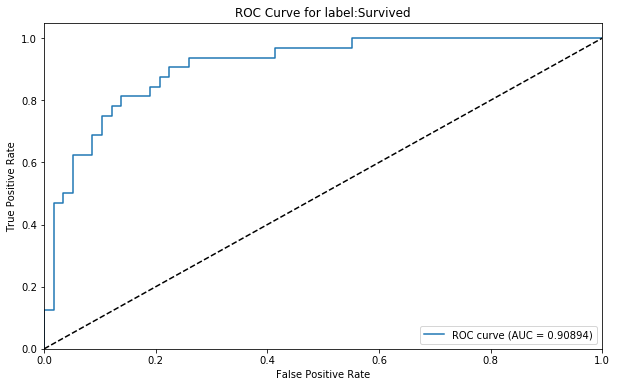

Average precision-recall score: 0.82
Macro F1 score, averaged over all classes: 0.82


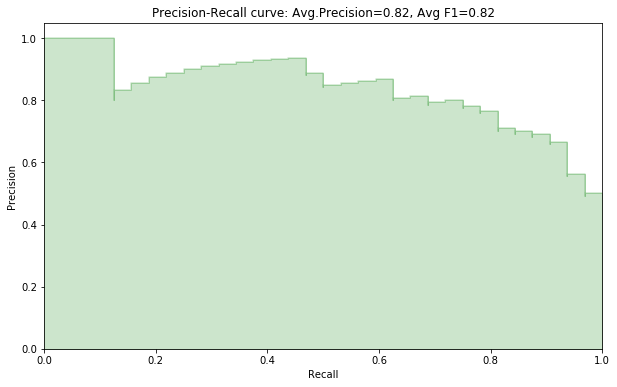

After multiple models, Ensemble Model Results:
    Balanced Accuracy Score = 79.203%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        58
           1       0.79      0.69      0.73        32

   micro avg       0.82      0.82      0.82        90
   macro avg       0.81      0.79      0.80        90
weighted avg       0.82      0.82      0.82        90

[[52  6]
 [10 22]]

Single Model is better than Ensembling Models for this data set.


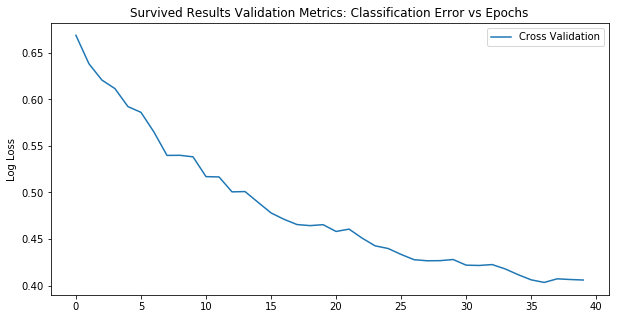

    Time taken for this Target (in seconds) = 23


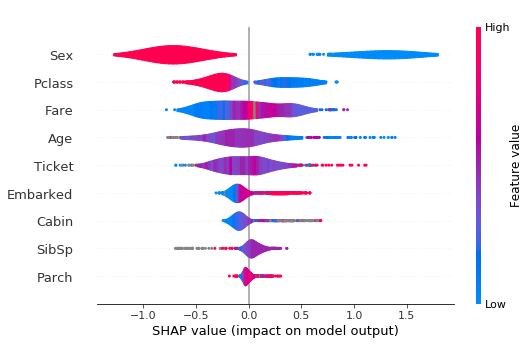

Plotting SHAP (SHapley Additive exPlanations) values to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin
Test Data predictions using Best Threshold = 0.48
    Saving predictions to .\Survived\Survived_Binary_Classification_test_modified.csv
    Saving predictions to .\Survived\Survived_Binary_Classification_submission.csv
    Saving predictions to .\Survived\Survived_Binary_Classification_train_modified.csv
Time Taken in mins = 0.4 for the Entire Process


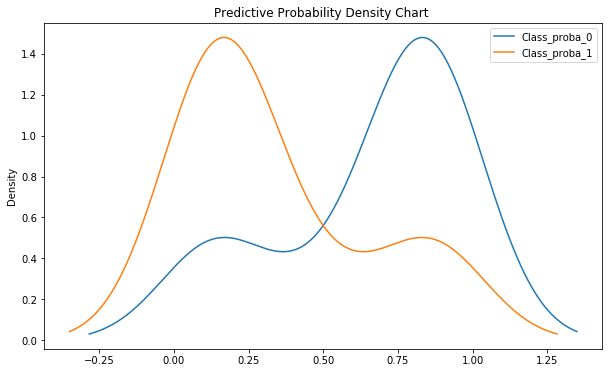

In [14]:
#### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)                      

In [15]:
######## Use this to Test Classification Problems Only ####
modelname='XGBoost'
def accu(results, y_cv):
    return (results==y_cv).astype(int).sum(axis=0)/(y_cv.shape[0])
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
try:
    print('Test results since target variable is present in test data:')
    print(confusion_matrix(test[target].values,testm[target+'_'+modelname+'_predictions'].values))
    print('\nBalanced Accuracy = %0.2f%%\n' %(100*balanced_accuracy_score(test[target].values, testm[target+'_'+modelname+'_predictions'].values)))
    print(classification_report(test[target].values,testm[target+'_'+modelname+'_predictions'].values))
except:
    print('No target variable present in test data. No results')

Test results since target variable is present in test data:
[[11  0]
 [ 0  4]]

Balanced Accuracy = 100.00%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

